# BREAST CANCER PREDICTION MODEL

In this notebook we'll create a breast cancer prediction model using machine learning

we can get the data from [kaggle](https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset)

In [0]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix


In [46]:
! git clone https://github.com/zakywisnu/Bangkit-MLCC-Assignment


fatal: destination path 'Bangkit-MLCC-Assignment' already exists and is not an empty directory.


In [47]:
! ls
! ls Bangkit-MLCC-Assignment/

Bangkit-MLCC-Assignment  sample_data
Breast_cancer_data.csv	breast_cancer_prediction.py


## Exploratory Data Analysis and Data Pre-processing

In [48]:
df = pd.read_csv("/content/Bangkit-MLCC-Assignment/Breast_cancer_data.csv", delimiter=",")
df = df.reindex(np.random.permutation(df.index)) # shuffle the training set
df.describe()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


**Dataset Characteristics:**
  
  Number of Instances = 569
  
  Number of Attributes = 5


In [49]:
df.shape

(569, 6)

In [50]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [51]:
count = df.diagnosis.value_counts()
count

1    357
0    212
Name: diagnosis, dtype: int64

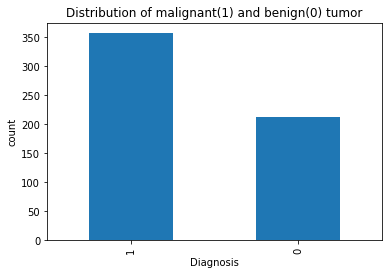

In [52]:
count.plot(kind='bar')
plt.title("Distribution of malignant(1) and benign(0) tumor")
plt.xlabel("Diagnosis")
plt.ylabel("count");


In [0]:
y_target = df['diagnosis']

In [54]:
df.columns.values

array(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'], dtype=object)

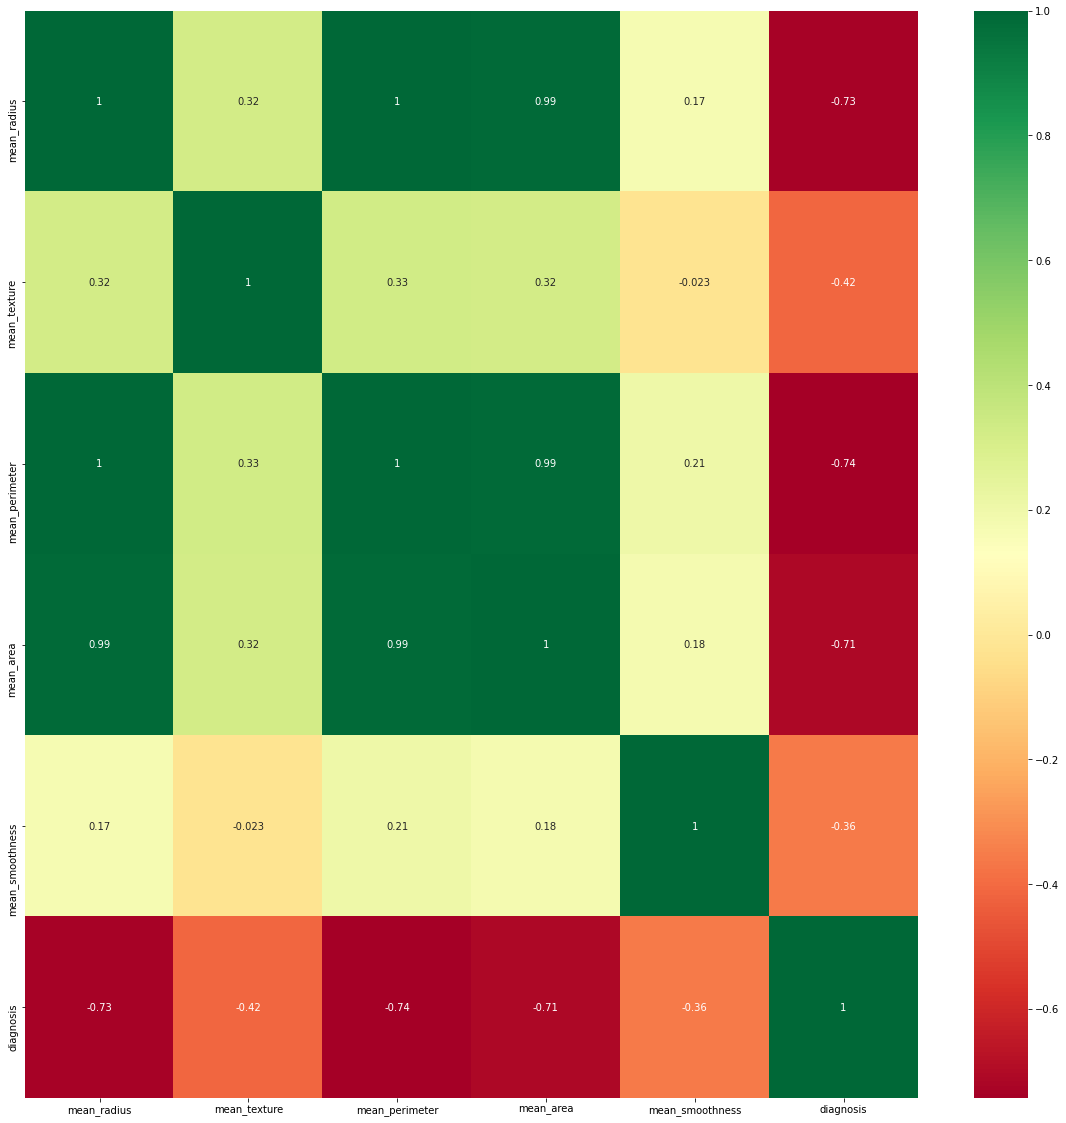

In [55]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
df['target'] = df['diagnosis'].map({0:'B',1:'M'}) 


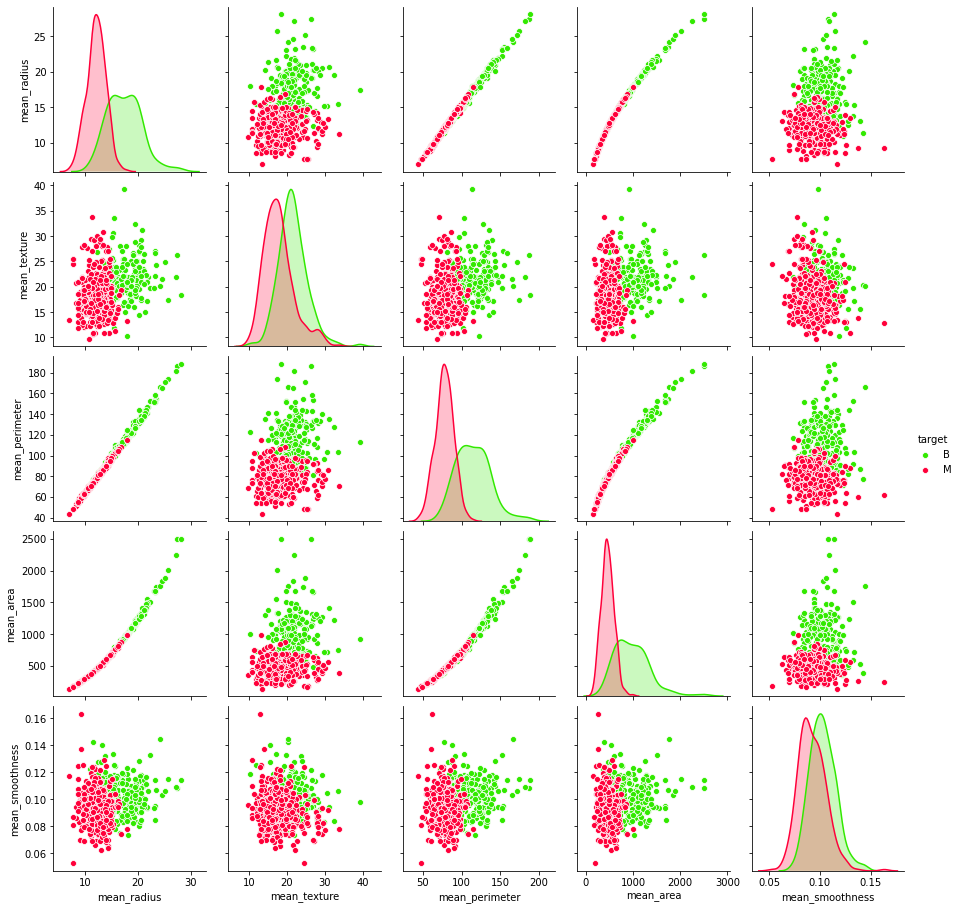

In [57]:
g = sns.pairplot(df.drop('diagnosis', axis = 1), hue="target", palette='prism');

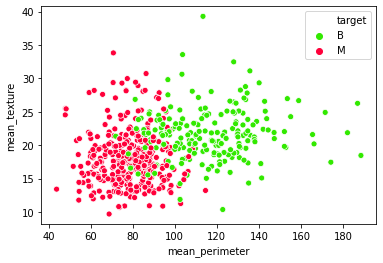

In [58]:
sns.scatterplot(x='mean_perimeter', y = 'mean_texture', data = df, hue = 'target', palette='prism');


### Train Test Split

the data will be split into Training 60%, Validation 20% and Testing 20%


In [0]:
X = df[["mean_perimeter", "mean_texture"]].values
y = df['diagnosis'].values

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25) 

## Scaling Data

In [0]:
# Scaling Data into 0 to 1 range
scaler = MinMaxScaler() 
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
seed = 5
np.random.seed(seed)
tf.random.set_seed(seed)

## Create the model using Sequential from keras API tf 2.0

In [0]:
model = Sequential() # NN Model 

model.add(Dense(units=2, activation='relu')) # Input Layer
model.add(Dense(units=2, activation='relu')) # Hidden Layer
model.add(Dense(units=1, activation='sigmoid')) # Output Layer

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

## Training the Model

In [63]:
early_stop = EarlyStopping(monitor='loss', mode='min',verbose=1,patience=10)
model.fit(x=X_train,y=y_train,epochs=500,validation_test=(X_val,y_val), verbose=1, callbacks=[early_stop])

Epoch 1/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.3959
Epoch 2/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.4076
Epoch 3/500
11/11 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.4575
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5601
Epoch 5/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.6598
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.7947
Epoch 7/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.8416
Epoch 8/500
11/11 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.8563
Epoch 9/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.8592
Epoch 10/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.8622
Epoch 11/

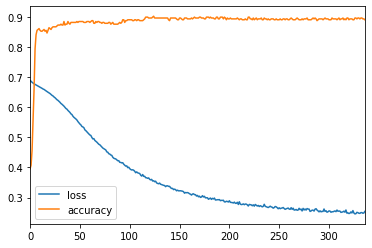

In [64]:
loss = pd.DataFrame(model.history.history)
loss.plot()

## Model Evaluation

In [65]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        40
           1       0.87      0.93      0.90        74

    accuracy                           0.87       114
   macro avg       0.87      0.84      0.85       114
weighted avg       0.87      0.87      0.87       114



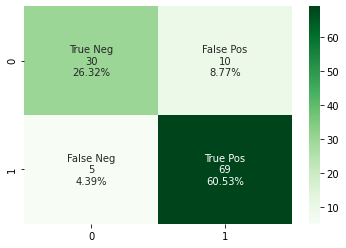

In [66]:
cf_matrix = confusion_matrix(y_test,predictions)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')
